# Проверка гипотез по увеличению выручки в интернет-магазине

**Цель исследования**: Приоритизация гипотез, запуск A/B-теста и анализ результатов для увеличения выручки

**Ход исследования**: 
1. Приоритизация гипотез (ICE, RICE)
2. Анализ A/B-теста (построение графиков и решение по итогам теста)

**Описание данных**:
1. Файл /datasets/hypothesis.csv.\
Hypothesis — краткое описание гипотезы;\
Reach — охват пользователей по 10-балльной шкале;\
Impact — влияние на пользователей по 10-балльной шкале;\
Confidence — уверенность в гипотезе по 10-балльной шкале;\
Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.


2. Файл /datasets/orders.csv.\
transactionId — идентификатор заказа;\
visitorId — идентификатор пользователя, совершившего заказ;\
date — дата, когда был совершён заказ;\
revenue — выручка заказа;\
group — группа A/B-теста, в которую попал заказ.


3. Файл /datasets/visitors.csv.\
date — дата;\
group — группа A/B-теста;\
visitors — количество пользователей в указанную дату в указанной группе A/B-теста

## Приоритизация гипотез

### Импорт данных, изучение и предобработка

In [1]:
#загрузить все библиотеки
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
pd.set_option('max_colwidth', 150) 
try:
    hypothesis = pd.read_csv('/datasets/hypothesis.csv')
except FileNotFoundError:
    hypothesis = pd.read_csv('/datasets/hypothesis.csv')  #датасет hypothesis
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [3]:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [4]:
hypothesis.describe()

,Reach,Impact,Confidence,Efforts
count,9.000000,9.000000,9.000000,9.000000
mean,4.777778,4.777778,5.555556,4.888889
std,3.153481,3.192874,3.045944,2.803767
min,1.000000,1.000000,1.000000,1.000000
25%,3.000000,3.000000,3.000000,3.000000
50%,3.000000,3.000000,7.000000,5.000000
75%,8.000000,7.000000,8.000000,6.000000
max,10.000000,10.000000,9.000000,10.000000


In [5]:
hypothesis.isna().sum()

Hypothesis    0
Reach         0
Impact        0
Confidence    0
Efforts       0
dtype: int64

In [6]:
hypothesis.duplicated().sum()

0

In [7]:
orders = pd.read_csv('/datasets/orders.csv') #датасет orders
visitors = pd.read_csv('/datasets/visitors.csv')  #датасет visitors

In [8]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [9]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [10]:
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [11]:
orders.isna().sum()

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

In [12]:
orders.duplicated().sum()

0

In [13]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [14]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [15]:
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [16]:
visitors.isna().sum()

date        0
group       0
visitors    0
dtype: int64

In [17]:
visitors.duplicated().sum()

0

In [18]:
len(np.intersect1d(orders.query('group=="A"')['visitorId'].unique(),orders.query('group=="B"')['visitorId'].unique()))

58

58 пользователей попали в обе группы. Однако корректно удалить их не представлется возможным, поскольку данные агрегированы и из orders удалятся, а из visitors нет.

**Вывод** На данном этапе были загружены необходимые библиотеки, а также сами датасеты.\
В данных отсутствуют пропуски и дубликаты. В orders и visits в столбце date был изменен тип данных на datetime.

### Применение фреймворков ICE, RICE

In [19]:
hypothesis['ICE'] = ((hypothesis['Impact'] * hypothesis['Confidence']) / hypothesis['Efforts']).round(1)
hypothesis['RICE'] = (hypothesis['Reach'] * hypothesis['Impact'] * hypothesis['Confidence']) / hypothesis['Efforts']

In [20]:
hypothesis[['ICE', 'Hypothesis']].sort_values(by='ICE', ascending=False).style.highlight_max(axis=0)

,ICE,Hypothesis
8,16.200000,"Запустить акцию, дающую скидку на товар в день рождения"
0,13.300000,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей"
7,11.200000,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок"
6,8.000000,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию"
2,7.000000,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа"
1,2.000000,"Запустить собственную службу доставки, что сократит срок доставки заказов"
5,1.300000,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов"
3,1.100000,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар"
4,1.000000,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей"


In [21]:
hypothesis[['RICE', 'Hypothesis']].sort_values(by='RICE', ascending=False).style.highlight_max(axis=0)

,RICE,Hypothesis
7,112.000000,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок"
2,56.000000,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа"
0,40.000000,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей"
6,40.000000,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию"
8,16.200000,"Запустить акцию, дающую скидку на товар в день рождения"
3,9.000000,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар"
1,4.000000,"Запустить собственную службу доставки, что сократит срок доставки заказов"
5,4.000000,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов"
4,3.000000,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей"


**Вывод:** \
Гипотезы-лидеры по **ICE**\
-Запустить акцию, дающую скидку на товар в день рождения\
-Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей\
-Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок\

Гипотезы-лидеры по **RICE**\
-Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок\
-Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа\
-Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей\
-Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию

Различия в результатах связаны с тем, что в фреймворке RICE учитывается показатель Reach(охват пользователей).\
Гипотезы-лидеры по RICE являются наиболее приоритетными и подходящими для проверки.

## Анализ A/B-теста

### График кумулятивной выручки по группам

In [22]:
datesGroups = orders[['date', 'group']].drop_duplicates()

ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transactionId': 'nunique',
            'visitorId': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg(
        {'date': 'max', 
         'group': 'max', 
         'visitors': 'sum'
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]

cumulativeData.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


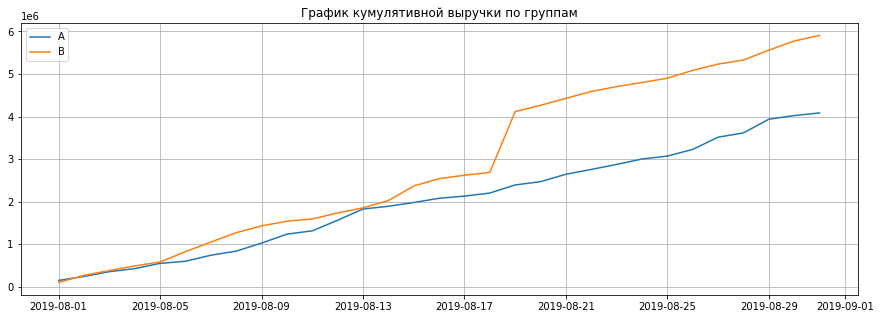

In [23]:
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue','orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue','orders']]

plt.figure(figsize=(15,5))
plt.plot(cumulativeRevenueA['date'],cumulativeRevenueA['revenue'],label='A')
plt.plot(cumulativeRevenueB['date'],cumulativeRevenueB['revenue'],label='B')
plt.legend()
plt.grid()
plt.title('График кумулятивной выручки по группам');

Практически с самого начала выручка группы B опережает А, а 19 августа вообще показывает сильный скачок роста и продолжает отрываться вперед.\
Видимо, в этот день в группе В был крупный заказ/заказы или резкое увеличение их количества, что и повлияло на результат.

### График кумулятивного среднего чека по группам

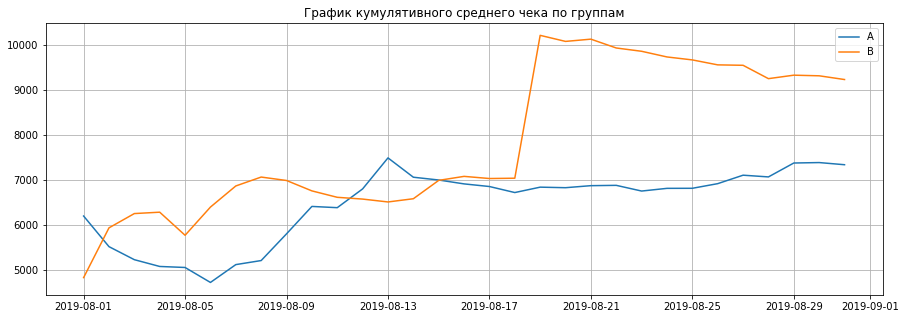

In [24]:
plt.figure(figsize=(15,5))
plt.plot(cumulativeRevenueA['date'],cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'],label='A')
plt.plot(cumulativeRevenueB['date'],cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'],label='B')
plt.legend()
plt.grid()
plt.title('График кумулятивного среднего чека по группам');

1го и 13го августа средний чек группы А был выше. Однако все остальные дни преимущество было за группой В.\
Также на графике видно, что 19го августа в группе В все-таки было не увеличение кол-ва заказов, а именно дорогой заказ, который и увеличил средний чек с 7 до 10 тыс. руб. \
После 19го августа чек группы В имеет тенденцию к снижению и пока неясно, остановится ли снижение. В то время как чек группы А с середины августа установился и медленно растет.

### График относительного изменения кумулятивного среднего чека группы B к группе A

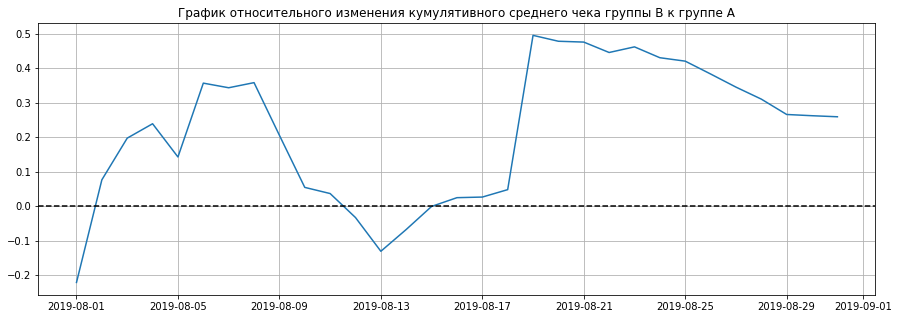

In [25]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB,left_on='date',right_on='date',how='left',suffixes=['A','B'])

plt.figure(figsize=(15,5))
plt.plot(mergedCumulativeRevenue['date'],(mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/ 
        (mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.axhline(y=0,color='black',linestyle='--')
plt.grid()
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A');

На графике относительного изменения видно, как нестабилен чек группы В: рост до 7го августа, 
затем резкое падение вплоть до 13 августа, снова рост, достижение пика 19го августа за счет дорогого заказа и затем постепенное снижение.\
За счет того заказа в моменте средний чек группы В был на 50% выше группы А.

### График кумулятивной конверсии

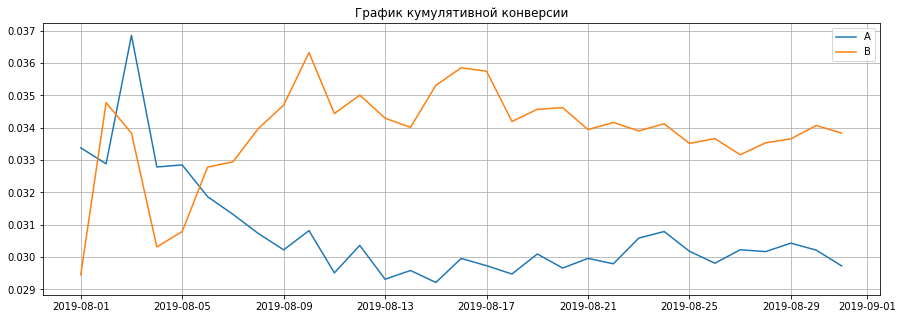

In [26]:
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

plt.figure(figsize=(15,5))
plt.plot(cumulativeDataA['date'],cumulativeDataA['conversion'],label='A')
plt.plot(cumulativeDataB['date'],cumulativeDataB['conversion'],label='B')
plt.legend()
plt.grid()
plt.title('График кумулятивной конверсии');

3го августа конверсия группы А была самой высокой среди групп и почти достигла значения 0,037. \
Однако после этого резко падала до 9го августа и последующие дни колебалась от 0,029 до 0,031.\
Можно сказать, что конверсия группы В лучше группы А, поскольку с середины месяца более-менее установилась и была в диапазоне от 0,033 до 0,036.

### График относительного прироста конверсии группы B относительно группы A

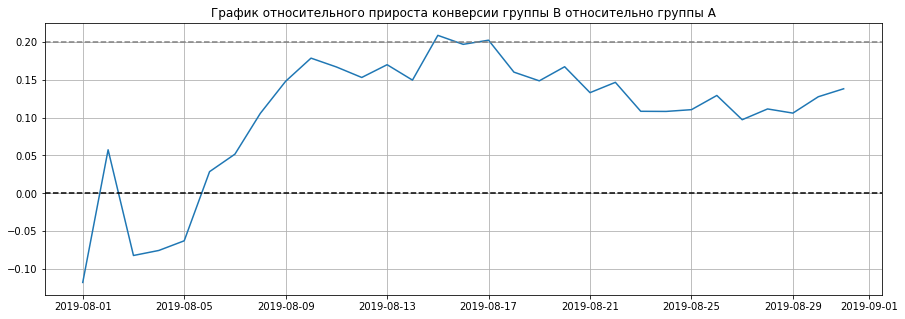

In [27]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']],left_on='date',right_on='date',how='left',suffixes=['A','B'])

plt.figure(figsize=(15,5))
plt.plot(mergedCumulativeConversions['date'],mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1)
plt.grid()
plt.title('График относительного прироста конверсии группы B относительно группы A')
plt.axhline(y=0,color='black',linestyle='--')
plt.axhline(y=0.2,color='grey',linestyle='--');

С 1 по 5 августа конверсия группы А показывала лучший результат, чем группы В. \
Но все последующее время конверсия группы В превалировала и в середине месяца была на 20% выше, затем снижалась, но все равно была выше значения 0,1.

### Точечный график количества заказов по пользователям

       visitorId  orders
1023  4256040402      11
591   2458001652      11
569   2378935119       9
487   2038680547       8
44     199603092       5
744   3062433592       5
55     237748145       5
917   3803269165       5
299   1230306981       5
897   3717692402       5


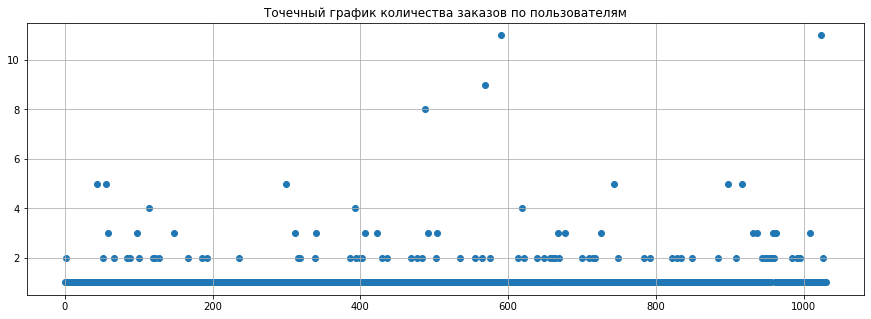

In [28]:
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)
ordersByUsers.columns = ['visitorId', 'orders']

print(ordersByUsers.sort_values(by='orders', ascending=False).head(10))

# серия из чисел от 0 до количества наблюдений в ordersByUsers
x_values = pd.Series(range(0, len(ordersByUsers)))

plt.figure(figsize=(15,5))
plt.scatter(x_values,ordersByUsers['orders'])
plt.grid()
plt.title('Точечный график количества заказов по пользователям');

По графику видно, что большинство пользователей делали 1 заказ, совсем мало делали 2 заказа. Кол-во пользователей, совершающих 3 и более заказа, ничтожно мало.

### 95-й и 99-й перцентили количества заказов на пользователя

In [29]:
print(np.percentile(ordersByUsers['orders'], [95, 99]))

[2. 4.]


Не более 5% пользователей делают больше 2 заказов и не более 1% делают больше 4 заказов.\
Выберем 2 заказа за нижнюю границу количества заказов. То, что больше считаем аномальным кол-вом.

### Точечный график стоимостей заказов

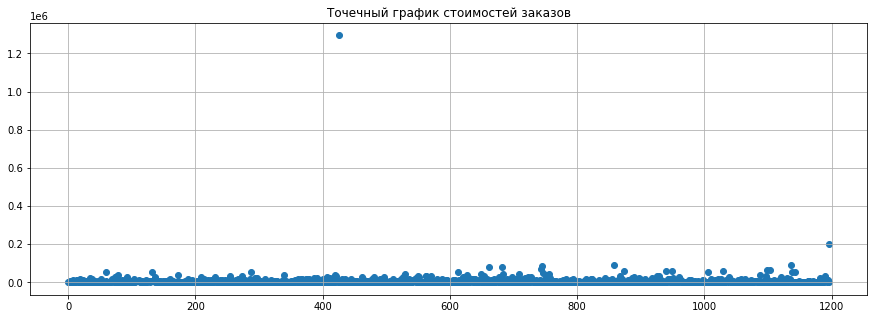

In [30]:
x_values = pd.Series(range(0,len(orders['revenue'])))

plt.figure(figsize=(15,5))
plt.scatter(x_values, orders['revenue'])
plt.grid()
plt.title('Точечный график стоимостей заказов');

Все заказы, кроме двух (один из которых более чем на 1,2 млн. руб., второй на 200 тыс. руб), не превышали 100 тыс. руб.\
По графику плохо видно детали, ниже посчитаем перцентили и картина будет более ясной.

### 95-й и 99-й перцентили стоимости заказов

In [31]:
print(np.percentile(orders['revenue'], [95, 99])) 

[28000.  58233.2]


Не более 5% пользователей заказывают на 28 тыс. руб. и не более 1% на 58,2 тыс. руб.\
Выберем 28 тыс. руб. за нижнюю границу стоимости заказа. То, что больше считаем аномальной стоимостью.

###  Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным

Гипотезы:\
Нулевая: различий в среднем количестве заказов на посетителя между группами нет.\
Альтернативная: различия в среднем количестве заказов на посетителя между группами есть.

In [32]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

In [33]:
data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

display(data.head(5))

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


In [34]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']

sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

print("{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB,alternative = 'two-sided')[1]))

print("{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

0.017
0.138


Первое число — p-value = 0.017 меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет, отвергаем. 
Относительный выигрыш группы B равен 13.8% — второе число в выводе.\
**Вывод: Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным есть.**

###  Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным

Гипотезы:\
Нулевая: различий в среднем чеке заказа между группами нет.\
Альтернативная: различий в среднем чеке заказа между группами  есть.

In [35]:
print('{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'],alternative = 'two-sided')[1]))
print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

0.729
0.259


Первое число — p-value = 0.729 больше 0.05. Значит, альтернативную гипотезу о том, что статистически значимые различия в среднем числе заказов между группами есть, отвергаем. 
Относительный выигрыш группы B равен 25.9% — второе число в выводе.\
**Вывод: Статистической значимости различий в среднем чеке заказа между группами по «сырым» данным нет.**

### Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным

Гипотезы:\
Нулевая: различий в среднем количестве заказов на посетителя между группами нет.\
Альтернативная: различия в среднем количестве заказов на посетителя между группами есть.

In [36]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['userId'],     #больше 2 заказов и на сумму больше 28 тыс.руб - аномалии
        ordersByUsersB[ordersByUsersB['orders'] > 2]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 28000]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))

1099    148427295
18      199603092
928     204675465
23      237748145
37      249864742
dtype: int64


In [37]:
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))]['orders'], 
                             pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), 
                                       name='orders')],axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))]['orders'], 
                             pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), 
                                       name='orders')],axis=0) 

In [38]:
print('{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered,alternative = 'two-sided')[1]))
print('{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

0.013
0.173


Первое число — p-value = 0.013 меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет, отвергаем. 
Относительный выигрыш группы B равен 17.3% — второе число в выводе. Это выше, чем по сырым данным (13,8%).\
**Вывод: Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным есть.**

### Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным.

Гипотезы:\
Нулевая: различий в среднем чеке заказа между группами нет.\
Альтернативная: различий в среднем чеке заказа между группами  есть.

In [39]:
print("{0:.3f}".format(stats.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],alternative = 'two-sided')[1]))

print("{0:.3f}".format(
    orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()/
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() - 1)) 

0.738
-0.020


Первое число — p-value = 0.738 больше 0.05. Значит, альтернативную гипотезу о том, что статистически значимые различия в среднем числе заказов между группами есть, отвергаем. 
Относительный проигрыш группы B равен 2% — второе число в выводе. Это намного ниже, чем по сырым данным (25,9%).Видимо, тот заказ на 1,2 млн. руб. был в группе В.\
**Вывод: Статистической значимости различий в среднем чеке заказа между группами по «очищенным» данным нет.**

### Принятие решения по результатам теста

-Статистическая значимость различий в среднем количестве заказов на посетителя между группами и по «очищенным», и по «сырым» данным есть.\
Относительный выигрыш группы В по очищенным данным - 17,3%, по сырым - 13,8%. То есть выигрыш в обоих случаях.

-Статистической значимости различий в среднем чеке заказа между группами и по «очищенным», и по «сырым» данным нет.\
Относительный выигрыш группы В по сырым данным 25,9%, а по очищенным стал -2% (из-за аномально высокой стоимости одного заказа на >1,2 млн. руб., который мы убрали).

**Вывод: Исходя из результатов, тест следует остановить и зафиксировать победу группы В. \
Группа В показывает лучшие результаты по конверсии, а по среднему чеку отличий практически нет.**